# EDA

# 0. Import

In [368]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from itertools import product
import matplotlib.image as img

# 1. Dataframe 생성 및 확인

## 1-1. Dataframe 생성

In [369]:
data_path = './input/data/'
train_data = pd.read_csv(data_path+"train/train.csv")
train_df = pd.DataFrame(train_data)

In [370]:
train_df

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006955,male,Asian,19,006955_male_Asian_19
2696,006956,male,Asian,19,006956_male_Asian_19
2697,006957,male,Asian,20,006957_male_Asian_20
2698,006959,male,Asian,19,006959_male_Asian_19


## 1-2. Dataframe 확인

### 1-2-1. 결측치 확인

In [371]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


> 결측값은 없다.

### 1-2-2. data size 및 feature 확인

In [372]:
print(f'Data size: {train_df.shape[0]}')
print(f'Number of features: {train_df.shape[1]}')
print(f'Features: {list(train_df.columns)}')

Data size: 2700
Number of features: 5
Features: ['id', 'gender', 'race', 'age', 'path']


### 1-2-3. Id 확인 
#### **id가 왜 object로 되어있을까?**

In [373]:
count=0
for i,id_ in enumerate(train_df['id']):
    try:
        int(id_)
    except:  # 숫자가 아닌 것이 있나?
        print(f'{i}: {id_}')
        count+=1
print(f'숫자가 아닌 id: {count}개')
        

207: 000600-1
324: 000748-1
400: 001024-1
403: 001026-1
407: 001029-1
417: 001038-1
423: 001043-1
428: 001047-1
501: 001131-1
503: 001132-1
548: 001179-1
552: 001182-1
554: 001183-1
557: 001186-1
559: 001187-1
668: 001359-1
732: 001464-1
755: 001492-1
756: 001493-1
758: 001494-1
759: 001495-1
761: 001496-1
764: 001498-1
782: 001517-1
839: 001583-1
879: 001630-1
892: 001645-1
895: 001647-1
981: 001774-1
982: 001774-2
984: 001775-1
1026: 001840-1
1373: 003403-1
1388: 003424-1
1436: 003505-1
1440: 003508-1
1442: 003509-1
1445: 003511-1
1449: 003514-1
1840: 004319-1
2009: 005067-1
숫자가 아닌 id: 41개


> -1이 40개, -2가 1개 있음

In [374]:
# 여러개 값 가져오기 : https://rfriend.tistory.com/460

train_df[train_df['id'].isin(['001774','001774-1','001774-2'])]
# train_df[(train_df['id']=='001774')|(train_df['id']=='001774-1')|(train_df['id']=='001774-2')]

,id,gender,race,age,path
980,001774,female,Asian,58,001774_female_Asian_58
981,001774-1,female,Asian,52,001774-1_female_Asian_52
982,001774-2,male,Asian,52,001774-2_male_Asian_52


> **같은 사람이 아니다!!**

#### id는 중복이 있는가? **** 수정완료

In [8]:
# 중복 확인 :  https://sy-log.tistory.com/60

train_df[train_df.duplicated(['id'])]

,id,gender,race,age,path
1367,003397,female,Asian,19,003397_female_Asian_19


> 있다.

In [9]:
train_df[train_df['id']=='003397']

,id,gender,race,age,path
1366,003397,female,Asian,20,003397_female_Asian_20
1367,003397,female,Asian,19,003397_female_Asian_19


> #### 다른사람이므로 id와 path를 바꿔야 할 것 같다. 
**변경완료**
`003397_female_Asian_20` --> `007000_female_Asian_20`

#### path는 중복이 있는가?

In [375]:
train_df[train_df.duplicated(['path'])]

,id,gender,race,age,path


> 없다.

#### csv에 있는 항목과 path 이름에 있는 정보는 일치하는가?

In [376]:
# slicing 관련: https://rfriend.tistory.com/448

path_df = pd.DataFrame()
path_df['id'],path_df['gender'],path_df['race'],path_df['age'] = train_df['path'].str.split('_').str
path_df = path_df.astype({'age':'int'}) # str to int

<ipython-input-376-95b134c65eae>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  path_df['id'],path_df['gender'],path_df['race'],path_df['age'] = train_df['path'].str.split('_').str


In [377]:
path_df

,id,gender,race,age
0,000001,female,Asian,45
1,000002,female,Asian,52
2,000004,male,Asian,54
3,000005,female,Asian,58
4,000006,female,Asian,59
...,...,...,...,...
2695,006955,male,Asian,19
2696,006956,male,Asian,19
2697,006957,male,Asian,20
2698,006959,male,Asian,19


In [378]:
# matching
print(train_df[train_df['id']!=path_df['id']],'\n')
print(train_df[train_df['gender']!=path_df['gender']],'\n')
print(train_df[train_df['race']!=path_df['race']],'\n')
print(train_df[train_df['age']!=path_df['age']],'\n')

Empty DataFrame
Columns: [id, gender, race, age, path]
Index: [] 

Empty DataFrame
Columns: [id, gender, race, age, path]
Index: [] 

Empty DataFrame
Columns: [id, gender, race, age, path]
Index: [] 

Empty DataFrame
Columns: [id, gender, race, age, path]
Index: [] 



> csv 파일의 path 이름은 잘 matching 되어있다.

#### csv에 있는 path는 실제로 존재하는가? or csv에 없는 path가 있는가?

In [379]:
folder_path_raw = os.listdir(f'{data_path}train/images') # 폴더 경로

In [380]:
# ._로 시작하는 경로 제외
folder_path=[]
for path in folder_path_raw:
    if path.startswith('._'):
        pass
    else:
        folder_path.append(path)

In [381]:
len(folder_path)

2700

In [382]:
train_df[~train_df['path'].isin(folder_path)]

,id,gender,race,age,path


> 모두 존재한다.

## 1-3. 필요한 Age tab 생성
- 현재 나이로 되어있기 때문에 실제 데이터에 대한 `<30`, `>=30 and <60`, `>=60` 탭의 생성이 필요

In [383]:
# https://www.delftstack.com/ko/howto/python-pandas/how-to-create-dataframe-column-based-on-given-condition-in-pandas/
age_grouping = [
    (train_df['age']<30),
    (30<=train_df['age']) & (train_df['age']<60),
    (train_df['age']>=60)
]
age_group_list = ['<30','>=30 and <60', '>=60']

In [384]:
train_df['age_group']=np.select(age_grouping,age_group_list,default='Not Specified')

In [385]:
train_df.head()

,id,gender,race,age,path,age_group
0,000001,female,Asian,45,000001_female_Asian_45,>=30 and <60
1,000002,female,Asian,52,000002_female_Asian_52,>=30 and <60
2,000004,male,Asian,54,000004_male_Asian_54,>=30 and <60
3,000005,female,Asian,58,000005_female_Asian_58,>=30 and <60
4,000006,female,Asian,59,000006_female_Asian_59,>=30 and <60


---
---
# 2. `.csv` file 확인

## 2-1. gender

In [386]:
print(f'values: {train_df.gender.unique()}')

values: ['female' 'male']


In [387]:
train_df.gender.value_counts()

female    1655
male      1045
Name: gender, dtype: int64

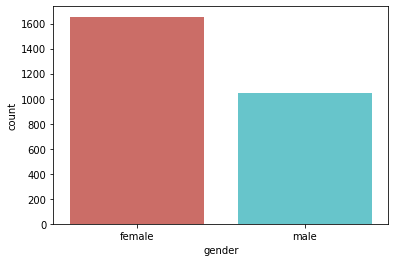

In [388]:
# color palette: https://seaborn.pydata.org/tutorial/color_palettes.html
# 성별을 색상으로 매칭할 수 있게끔 여성 - 빨강, 남성 - 파랑 으로 나오는 palette...(매번 바꾸긴 귀찮으니..)

sns.countplot(x='gender', data=train_df, palette='hls');

> 여성이 1.6배정도 더 많다.

## 2-2. Race

In [389]:
print(f'values: {train_df.race.unique()}')

values: ['Asian']


In [390]:
train_df.race.count()

2700

> Asian 밖에 없다

## 2-3. Age

### 2-3-1. Age로 보기

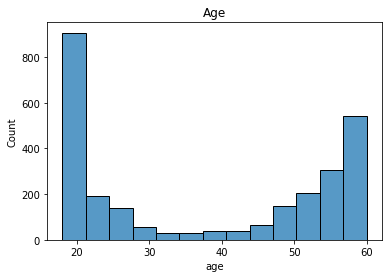

In [391]:
plt.title("Age")
sns.histplot(train_df, x = 'age', palette='hls');

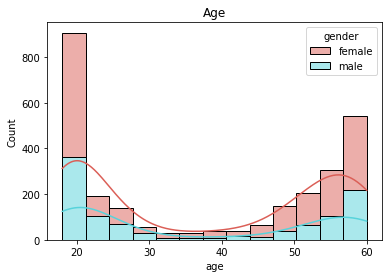

In [392]:
plt.title("Age")
sns.histplot(data = train_df,x = 'age', hue='gender', multiple = 'stack', palette='hls',kde=True);

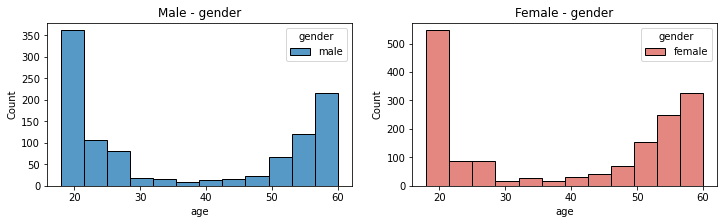

In [393]:
fig, ax = plt.subplots(figsize=(12,3),ncols = 2)
ax[0].set_title('Male - gender')
ax[1].set_title('Female - gender')

sns.histplot(data = train_df[train_df['gender']=='male'],x = 'age', hue='gender', multiple = 'stack',ax=ax[0])
sns.histplot(data = train_df[train_df['gender']=='female'],x = 'age', hue='gender', multiple = 'stack', palette='hls',ax=ax[1]);

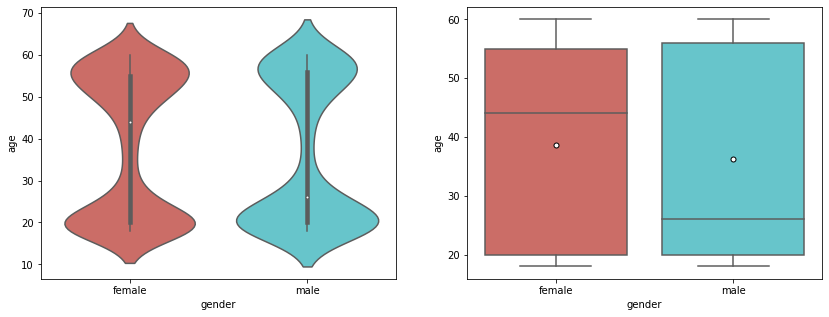

In [394]:
# boxplot에 평균 marker: https://datavizpyr.com/show-mean-mark-on-boxplot-using-seaborn-in-python/

fig, ax = plt.subplots(figsize=(14,5),ncols = 2)
ax=sns.violinplot(data=train_df, x="gender", y="age",palette='hls',ax=ax[0])

ax=sns.boxplot(data=train_df, x="gender", y="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
            palette='hls');

> - 나이는 60세가 최대이다.
>   - `60>=` group에 속하는 경우 60세이다
> - 남성과 여성의 분포 graph는 대체적으로 비슷하나, 여성 데이터가 더 많다
> - 중앙값은 차이가 많이 나지만, 평균은 큰 차이가 나지 않는다.(group으로 보면 같은 group에 속한다.)
>  - 중앙값에 있어서 차이가 나지만, 이는 30~60세 여성 data가 많아서 그런 것으로 예상 (2-3-2 참고)

### 2-3-2. Age group으로 보기

In [395]:
train_df.age_group.value_counts()

<30             1281
>=30 and <60    1227
>=60             192
Name: age_group, dtype: int64

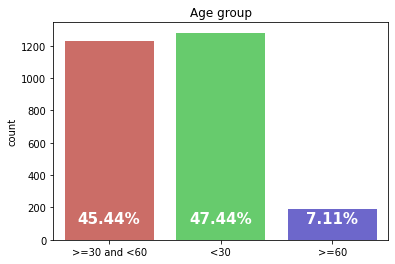

In [396]:
plt.title("Age group")
ax = sns.countplot(data=train_df,x = 'age_group', palette='hls')
plt.xlabel('')

# % 나타내기
counts = train_df.age_group.value_counts()
counts[0],counts[1]=counts[1],counts[0]
counts_pct = [f'{pct*100:.2f}%' for pct in counts/counts.sum()]
for idx, value in enumerate(counts_pct):
    ax.text(idx, 100, value, ha='center', size=15, color='w', fontweight='bold');
    


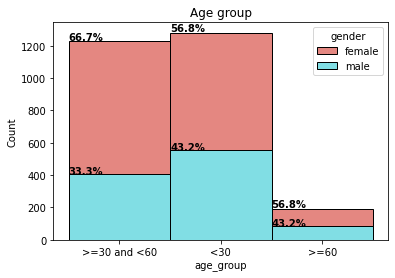

In [410]:
plt.title("Age group")
ax = sns.histplot(data = train_df,x = 'age_group', hue='gender', multiple = 'stack',palette='hls') #kde=True)


# % 표시
age_count= list(train_df.age_group.value_counts())
age_count[0],age_count[1]=age_count[1],age_count[0]

for i,p in enumerate(ax.patches):
    txt = str(((p.get_height() / (age_count[i%3]))*100).round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() if i//3 ==0 else age_count[i%3]+10
    ax.text(txt_x,txt_y,txt,horizontalalignment='left',size=10,fontweight ='bold')

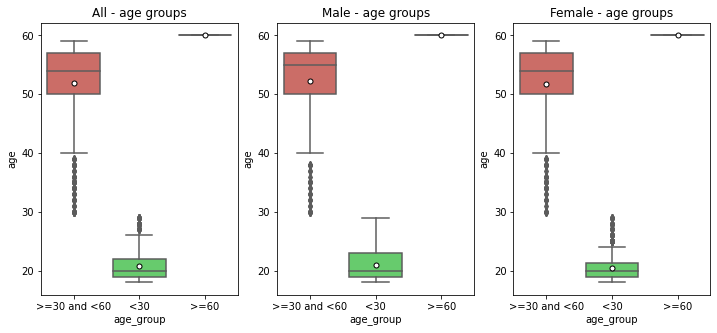

In [398]:

fig, ax = plt.subplots(figsize=(12,5),ncols = 3)

ax[0].set_title('All - age groups')
ax[1].set_title('Male - age groups')
ax[2].set_title('Female - age groups')

sns.boxplot( data = train_df, x='age_group',y='age',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
            palette='hls',ax=ax[0])

sns.boxplot( data = train_df[train_df['gender']=='male'],
            x='age_group',y='age',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
            palette='hls',ax=ax[1])

sns.boxplot( data = train_df[train_df['gender']=='female'],
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
            x='age_group',y='age',
            palette='hls',ax=ax[2]);


> - age group에서 60세 이상에 속하는 사람은 60세 뿐이다
> - 전체 분포, 남성, 여성의 분포가 <30을 제외하고 거의 비슷하다. 묶어서 해보는 것도 좋은 시도일 것 같다.
> - 그러나 dataset에서 여성의 나이 그룹 비중의 경우 30~60의 비중이 커서 따로 하는 것이 더 나을 것 같기도? 

### 2-3-3 생각해 볼 것
 - 성별을 나눈 후 나이를 그 안에서 또 볼 필요 없이 전체 데이터에서 해도 될 것 같다. (성별에 따른 나이 분포가 비슷)
 - 나이 예측시 처음부터 **`3개 그룹에 대한 classification`** 문제로 갈지 or **`나이 예측 한 후 group`** 으로 변경시킬지?
 - 60대라고 하기엔 60살밖에 없음, data가 너무 적다. --> `50 -> 60살로 넘어갈 때의 차이는 뭘까?` *이미지를 봐야할 듯*
 - 아니면 같은 label을 가진 사람끼리 cutmix를 해서 60대의 data를 늘려야 할 것 같다.

---
---
# 3. 이미지 file 확인

Wear:Incorrect:Not Wear = 5:1:1

## 3-1. Class 생성 및 분포 파악
- 제시된 class의 순서대로 list를 만든다

<img src = "https://user-images.githubusercontent.com/45448731/130486051-4feed5f2-a7fd-47c0-a824-0ece510dbf59.png" width="500px">


In [399]:
# product 사용법: https://xzio.tistory.com/1694

mask = ['Wear', 'Incorrect', 'Not Wear']
gender= ['male', 'female']
age_group = ['<30', '>=30 and <60', '>=60']

class_ = list(product(mask, gender, age_group))
class_

[('Wear', 'male', '<30'),
 ('Wear', 'male', '>=30 and <60'),
 ('Wear', 'male', '>=60'),
 ('Wear', 'female', '<30'),
 ('Wear', 'female', '>=30 and <60'),
 ('Wear', 'female', '>=60'),
 ('Incorrect', 'male', '<30'),
 ('Incorrect', 'male', '>=30 and <60'),
 ('Incorrect', 'male', '>=60'),
 ('Incorrect', 'female', '<30'),
 ('Incorrect', 'female', '>=30 and <60'),
 ('Incorrect', 'female', '>=60'),
 ('Not Wear', 'male', '<30'),
 ('Not Wear', 'male', '>=30 and <60'),
 ('Not Wear', 'male', '>=60'),
 ('Not Wear', 'female', '<30'),
 ('Not Wear', 'female', '>=30 and <60'),
 ('Not Wear', 'female', '>=60')]

In [400]:
# 새로운 df 생성 : https://wikidocs.net/4367

raw_data={'class_num':[],'count':[]}
for i, (mask, gender, age) in enumerate(class_):
    count =train_df[(train_df['gender'] == gender) & (train_df['age_group']==age)].shape[0]
    if mask=='Wear':
        count = count*5 # wear: 5개
    raw_data['class_num'].append(i)
    raw_data['count'].append(count)

In [401]:
count_class=pd.DataFrame(raw_data)
count_class

,class_num,count
0,0,2765
1,1,2045
2,2,415
3,3,3640
4,4,4090
5,5,545
6,6,553
7,7,409
8,8,83
9,9,728


2700


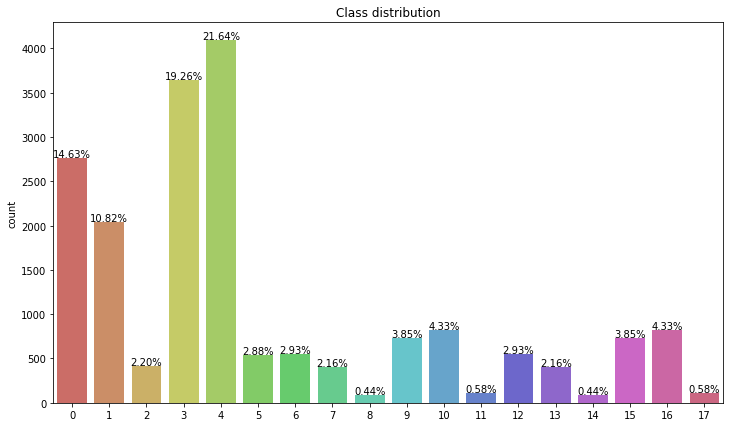

In [402]:
print(counts.sum())
fig = plt.subplots(figsize=(12,7))

plt.title("Class distribution")
ax = sns.barplot(x = count_class['class_num'],y=count_class['count'],palette='hls') #kde=True)
plt.xlabel('')

# % 나타내기
counts = count_class['count']
counts_pct = [f'{pct*100:.2f}%' for pct in counts/counts.sum()]
for idx, value in enumerate(counts_pct):
    ax.text(idx, count_class['count'][idx]+10, value, ha='center', size=10);



> class 불균형이 심하다..!! 60세 이상은 완전 차이난다..
> 성별, 나이, 착용여부 쪼개기(18개 class 말고)
#### 시도해볼만한 방법?
  - Cycle GAN으로 이미지 생성
  - https://dining-developer.tistory.com/27
      - under/over sampling
      - Cost-sensitive learning
      - SMOTE
      - ADASYN (SMOTE의 개선된 버전) - cost에 가중치를 더 많이 줌
  

## 3-2. 이미지 확인

In [405]:
# slack 시각화 게시판 코드 참고
def print_image(startnum,num_people=10):
        image_folder_path = f'{data_path}train/images/'
        file_name=['normal','incorrect_mask','mask1','mask2','mask3','mask4','mask5']
        fig,axes = plt.subplots(num_people,7, figsize=(10,num_people*2),dpi=150)
        for j in range(startnum,startnum+num_people):
            sample = train_df[startnum:startnum+num_people].loc[j]
            sample =list(sample)
            path = sample[4]
            sample_path = os.path.join(image_folder_path,path)
            file_extension = os.listdir(sample_path)[0].split('.')[-1] #확장자 가져오기

            sample_split=path.split('_')
            print(sample_split)
            
            for i , name in enumerate(file_name):
                image_path=os.path.join(sample_path,f'{name}.{file_extension}')
                image=img.imread(image_path)
                axes[j-startnum][i].imshow(image)
                axes[j-startnum][i].axis('off')
                axes[j-startnum][i].set_title(f'{name[0]}_{sample_split[1][0]}_{sample_split[3]}')
            
        plt.show()

`print_image(170,3) # 시작 번호/몇개출력?`

### 사진 공개하면 안되어서 지움

### 시각화 결과 수정해야 할 Data는 다음과 같다.
|mask labeling error:<br> normal과 incorrect 서로 바꾸기|변경 여부|
|:---:|:---:|
000020|o
004418|o
005227|o

|male 라고 되어있는 것 female 로 변경|변경 여부|
|:---:|:---:|
001498-1|o
001200|o
004432|o

|female 라고 되어있는 것 male 로 변경|변경 여부|
|:---:|:---:|
|006359|o
|006360|o
|006361|o
|006362|o
|006363|o
|006364|o

|중복 이름|변경 이름|변경 여부|
|:---:|:---:|:---:|
|003397_female_Asian_20|007000_female_Asian_20|o|

기타 issue: 006578,6580_female_Asian_20 - mask5를 jpeg로 변경 (나머지는 .jpg임), 

이 data들을 변경하고 EDA를 다시 실행하자!!

---
### image에 대한 기타 issue (나: 0~899번 폴더까지 봄) (사진 지움)
####  각도 (001252)
<!--![image](https://user-images.githubusercontent.com/45448731/130567559-e7a60569-b6c0-4762-81ab-5e8daac94104.png)-->
- 내가 본 이미지 중에 normal이 정면이 아닌 사진 존재


#### 명암(001225)
<!--![image](https://user-images.githubusercontent.com/45448731/130573415-9d2d5860-dd37-447b-858b-b54e482ef3cc.png)-->
- 얼굴 명암이 심하게 진사진 존재


#### 밝기
<!--![image](https://user-images.githubusercontent.com/45448731/130573537-bf9407a8-9bfa-4e1f-8c6d-1aecfc6f3338.png)-->
- 이미지 중 밝기 다른 이미지 존재


#### 얼굴 size
<!--![image](https://user-images.githubusercontent.com/45448731/130573524-7bbe19e5-a9b6-4bf8-ae58-f9f653a01c63.png)-->
- 꼭 상반신이 나오지는 않음. 얼굴이 중앙에 위치하지 않을 때도 있음
- 같은 사람이라도 얼굴이 비슷한 사이즈로 잡힌 것이 아니라 앞-뒤로 왔다갔다 거리는 것이 있음
  - centercrop 못할수도? 얼굴이 위로 올라가서 머리카락이 잘리는것도있음

#### 머리 style
<!--![image](https://user-images.githubusercontent.com/45448731/130573853-5c14fa5c-dc7a-4224-940d-82946a5a62a4.png)-->
- 머리가 어떤 영향을 미칠지는 모르겠지만.... 이런 경우도 있음
- 머리가 짧으면 male로 구분하지 않을까? 하는 의문 존재 -> 머리 묶었을 때, 머리 짧은 할머니들(눈으로 봐도 모르겠을 때도 있음)

#### mask 착용
- 콧구멍만 살짝 가려졌을 때도 있음 ( 잘 착용한 것과 잘 구분되지 않음)
- 코를 덮지 않음
- 입, 턱만 가림
- 코, 입만 가림 (턱은 보임)
- 눈을 가림
- 눈, 코, 입 가림 (성별구분?잘될까)

#### mask의 색상
- mask 1~5가 같을거라고 생각했지만, 그냥 붙여진 번호인 듯
- 검정색, 파란색, 흰색, 분홍색, 노란색, 패턴. 중복되는 색상이 있을 때도 있음
- 패턴의 경우 매우 다양함
- 마스크가 아니라 두건?손수건? 같은것도 있음

# 4. 결론

- Data 비율

  - female : male = 1.6 : 1
  
  - <30 : >=30 and <60 : >=60 = 47.45 : 45.45 : 7.1


- Age관련 시도해볼만 한 것
  - 같은 label을 가진 사람끼리 cutmix를 해보는 것은 어떨까?

  - 55~59 나이대 사람들 반정도(or random)를 data imbalance 해소를 위해 60대로 학습시켜보는 것은 어떨까?
    - 60대라고 하기엔 60살밖에 없음. 50살에서 60살로 넘어갔을때의 차이는 뭘까? 잘 모르겠어서..


  - 성별 data를 나누어서 해보는 것은 어떨까?
    - 성별,female:age, male:age, 마스크 검출 이렇게 4번 실험
    
  - 나이를 예측한 후 group으로 변경시키는 것은 어떨까?
    - data가 너무 적나...

- Mask 관련 시도해볼만한 것

  - mask data를 흑백으로 해서 분류해보는것은? (색깔이 여러개)
    - 사람이 쓴 것을 고려하면 색깔 놔두는게 나으려나..?
    
  - 내가 가지고 있는 잘쓴/잘못쓴 data 적용
 
  
- Data Imbalance 문제 해결이 필요하다.

    - under/over sampling
    
    - cost-sensitivie learning
    
    - SMOTE
    
    - ADASYN
    
    
- Data Augmentation

    - Cycle Gan으로 얼굴생성
    
    - 명암과 밝기 -> test dataset에 있을 수도 있으므로 augmentation에서 추가해볼 만 할듯
    
    - 얼굴 size -> centercrop을 해서 얼굴이 잘릴수도 있을듯(일부지만)

    